In [ ]:
Time Series Assignment

In [23]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [24]:
# 2. Load and Explore Data
df = pd.read_csv("exchange_rate.csv", parse_dates=[0])

In [25]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [26]:
df.columns = ["Date", "USD_AUD"]   # adjust if more columns exist
df.set_index("Date", inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   USD_AUD  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


In [28]:
df.describe()

,USD_AUD
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [29]:
# Rename columns for consistency
df.rename(columns={df.columns[0]: "Date", df.columns[0]: "USD_AUD"}, inplace=True)

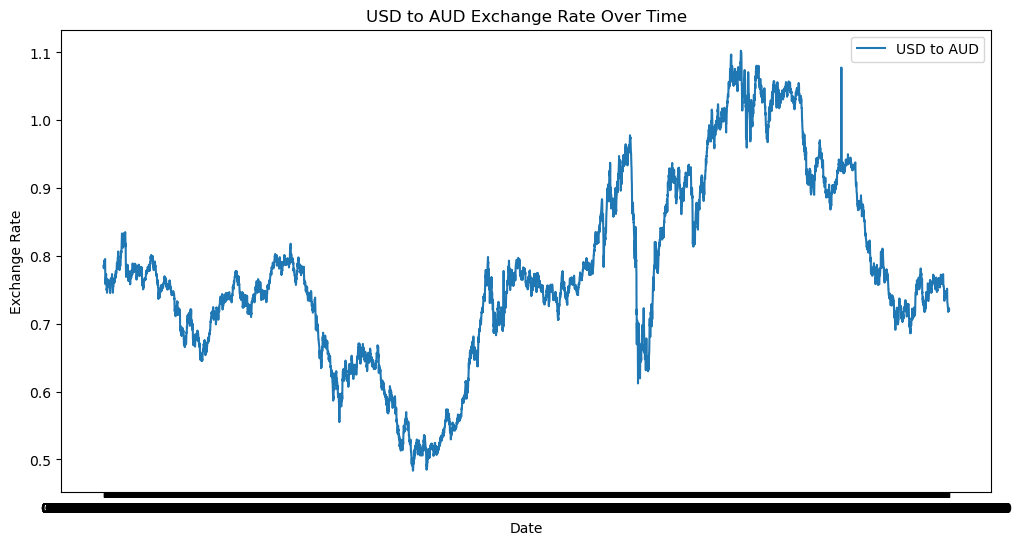

In [30]:
# 3. Plot Time Series
plt.figure(figsize=(12,6))
plt.plot(df["USD_AUD"], label="USD to AUD")
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [31]:
# 4. Check Missing Values
df.isnull().sum()
df = df.fillna(method="ffill")   # forward fill if missing values

In [32]:
# 5. Stationarity Check (ADF Test)
result = adfuller(df["USD_AUD"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.6649941807381423
p-value: 0.4492327353597957


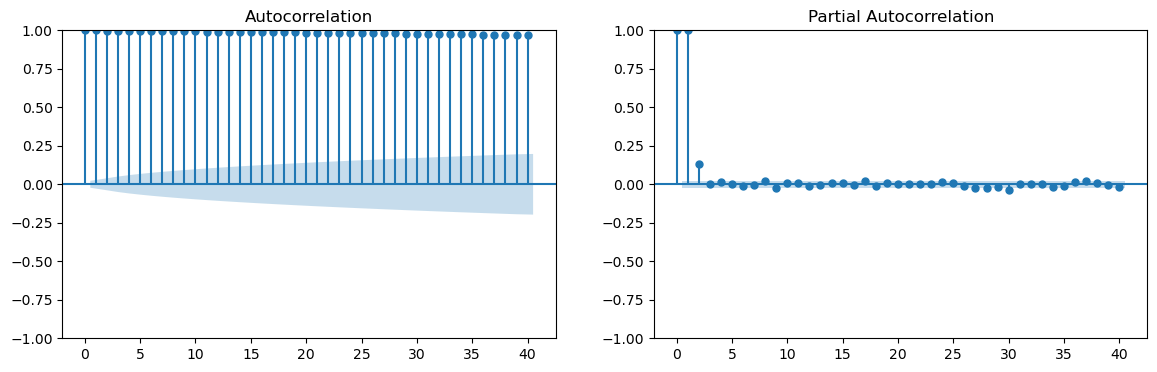

In [33]:
# 6. Plot ACF and PACF for ARIMA Parameters
fig, axes = plt.subplots(1,2, figsize=(14,4))
plot_acf(df["USD_AUD"], ax=axes[0], lags=40)
plot_pacf(df["USD_AUD"], ax=axes[1], lags=40)
plt.show()

In [34]:
# 7. Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
# 8. ARIMA Model
# Example ARIMA order (p,d,q) - adjust after ACF/PACF analysis
model_arima = ARIMA(train["USD_AUD"], order=(1,1,1))
fit_arima = model_arima.fit()

# Forecast
forecast_arima = fit_arima.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(train.index, train["USD_AUD"], label="Train")
plt.plot(test.index, test["USD_AUD"], label="Test")
plt.plot(test.index, forecast_arima, label="ARIMA Forecast")
plt.legend()
plt.show()

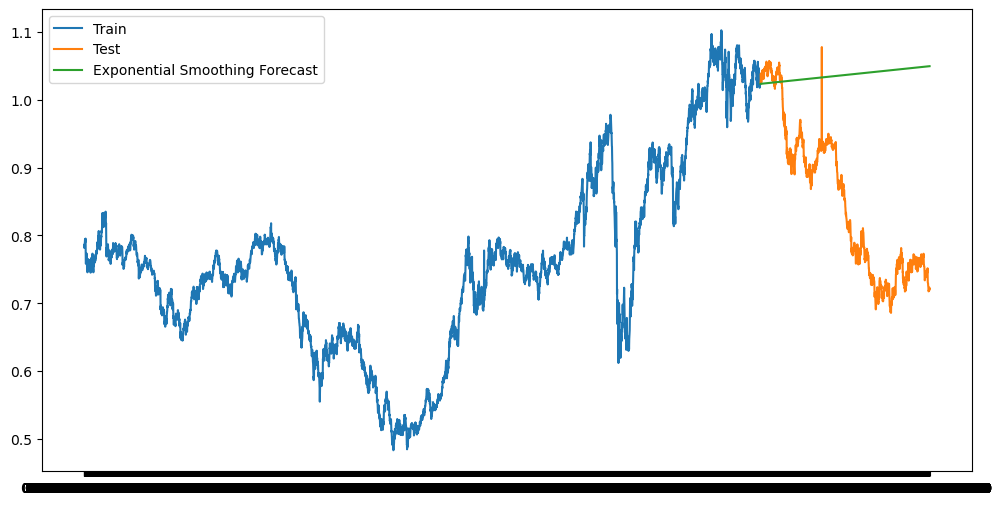

In [21]:
# 9. Exponential Smoothing Model
model_es = ExponentialSmoothing(train["USD_AUD"], trend="add", seasonal=None)
fit_es = model_es.fit()

forecast_es = fit_es.forecast(len(test))
plt.figure(figsize=(12,6))
plt.plot(train.index, train["USD_AUD"], label="Train")
plt.plot(test.index, test["USD_AUD"], label="Test")
plt.plot(test.index, forecast_es, label="Exponential Smoothing Forecast")
plt.legend()
plt.show()

In [22]:
# 10. Evaluation Metrics
def evaluate(true, pred, model_name):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred)/true)) * 100
    return pd.Series([mae, rmse, mape], index=["MAE", "RMSE", "MAPE"], name=model_name)

metrics_arima = evaluate(test["USD_AUD"], forecast_arima, "ARIMA")
metrics_es = evaluate(test["USD_AUD"], forecast_es, "Exponential Smoothing")

comparison = pd.concat([metrics_arima, metrics_es], axis=1)
display(comparison)

,ARIMA,Exponential Smoothing
MAE,0.177710,0.190270
RMSE,0.205437,0.220081
MAPE,NaN,NaN


In [ ]:
Summary

In [ ]:
Objective: Forecast future exchange rates using ARIMA and Exponential Smoothing (Holt or Holt-Winters as appropriate).  
Deliverables:
- Visualizations + explanations at each step
- Well-commented Python code
- Diagnostics and model evaluation with MAE, RMSE, MAPE
- Discussion / conclusion comparing models

In [ ]:
Notes
- The code auto-detects the date column and safely sets it as the index.
- If `pmdarima` is available, an automatic ARIMA order selection option will be used; otherwise we fall back to manual/order-from-ACF-PACF.